In [1]:
import jax
import scipy as sp
import jax.numpy as jnp
import matplotlib.pyplot as plt
import tifffile
import _glm as glmu
jnp.set_printoptions(formatter={"float": '{:7.5f}'.format})

boxsize       : 13 x 13
data min, max : 93 - 328


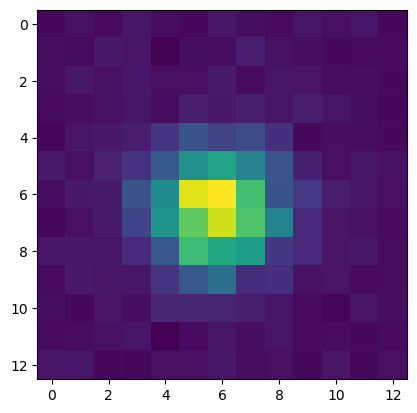

In [2]:
data = tifffile.imread("mol01_13x13.tif")
Ny, Nx = data.shape
# create meshgrid
_x = jnp.arange(-(Nx - 1) // 2, Nx // 2 + 1)
_y = jnp.arange(-(Ny - 1) // 2, Ny // 2 + 1)
gy, gx = jnp.meshgrid(_y, _x, indexing="ij")

print(f"boxsize       : {Ny} x {Nx}")
print(f"data min, max : {data.min():.0f} - {data.max():.0f}")

plt.imshow(data)

In [13]:
# initial parameter guess
p0 = jnp.array([0.0, 0.0, 1.0, 100.0, 100.0])
lb = jnp.array([-6.0, -6.0, 0.0, 0.0, 0.0]) # lower bound
ub = jnp.array([6.0, 6.0, 3.0, 1000.0, 1000.0]) # upper bound

# prototype of levenberg marquardt algorithm
max_iter = 100
gtol = 1e-3
nfeval = 0
list_pars = []

p = jnp.copy(p0)
mu = 1e-3
I = jnp.eye(p0.size)
list_pars.append(p0)

accept = 3.0
reject = 2.0

for it in range(max_iter):
    # compute objective function
    s = glmu.negloglik(p, data, gy, gx)
    # gradient, g
    g = glmu.fgrad(p, data, gy, gx)
    # approximated hessian, H
    J = glmu.funcjac(p, gy, gx).reshape(-1, len(p0))
    model = glmu.f(p, gy, gx).ravel()
    H = J.T @ jnp.diag(data.ravel() / model**2) @ J

    # local model
    


    

Gradient g = 
[0.00000 0.00000 1.00000 100.00000 100.00000]
[49.89516 -125.79113 -820.55713 -4.36847 -25.44833]
iter = 0, |g| = 4.2746E+01, |dp| = 2.1212E+02, s =   7.4817E+02, rho =  1.361, mu = 1.0000E-03
Gradient g = 
[-0.15353 0.39349 1.65564 138.44296 105.90755]
[17.45784 -50.10587 -106.92934 -2.51684 1.14078]
iter = 1, |g| = 1.2055E+01, |dp| = 3.0453E+02, s =   1.2536E+02, rho =  1.021, mu = 3.3333E-04
Gradient g = 
[-0.22995 0.61584 1.47095 209.10077 102.14499]
[-7.45265 22.73797 -153.34686 -0.80216 -2.32155]
iter = 2, |g| = 6.1718E+00, |dp| = 1.2807E+02, s =   3.5234E+01, rho =  1.042, mu = 1.1111E-04
Gradient g = 
[-0.21194 0.56107 1.48255 231.87050 102.31171]
[0.00970 -0.32958 -6.20010 -0.04689 -0.06249]
iter = 3, |g| = 3.1312E-01, |dp| = 1.3348E+01, s =   2.3839E+01, rho =  1.004, mu = 3.7037E-05
Gradient g = 
[-0.21195 0.56183 1.47949 234.12694 102.30711]
[0.00280 -0.01313 -0.08536 -0.00049 -0.00105]
iter = 4, |g| = 3.6007E-03, |dp| = 1.1826E-01, s =   2.3795E+01, rho = 18.

In [27]:
p

Array([-0.21196, 0.56186, 1.47947, 234.14633, 102.30714], dtype=float32)

In [15]:
covar = jnp.linalg.inv(Hopt)
print(covar)

[[0.00224 -0.00001 0.00000 0.00005 -0.00001]
 [-0.00001 0.00222 -0.00002 0.00402 0.00031]
 [0.00000 -0.00002 0.00122 -0.21047 -0.01436]
 [0.00005 0.00402 -0.21047 76.36839 0.59046]
 [-0.00001 0.00031 -0.01436 0.59046 0.92714]]


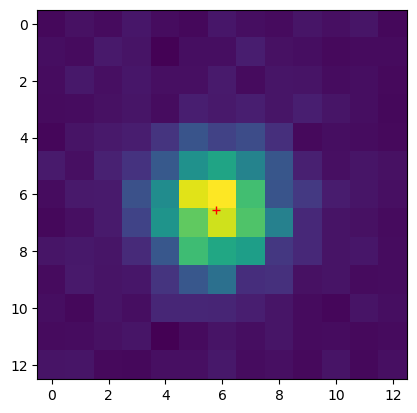

In [17]:
plt.imshow(data)
plt.plot(6 + p[0], 6 + p[1], 'r+')

In [18]:
psigmas = jnp.sqrt(covar)
print(psigmas)

[[0.04734     nan 0.00058 0.00708     nan]
 [    nan 0.04707     nan 0.06339 0.01765]
 [0.00058     nan 0.03497     nan     nan]
 [0.00708 0.06339     nan 8.73890 0.76841]
 [    nan 0.01765     nan 0.76841 0.96288]]


In [14]:
print(covar)

[ 0.002  0.002  0.001 76.368  0.927]


In [30]:
jnp.sqrt(jnp.diag(jnp.linalg.inv(H))) 

Array([ 8.744,  0.047,  0.047,  0.025,  0.963], dtype=float32)